# Alucar - Análise de Vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv('data/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'{alucar.shape[0]} linhas e {alucar.shape[1]} colunas.')

24 linhas e 2 colunas.


In [5]:
print('Dados nulos: ', alucar.isna().sum().sum())

Dados nulos:  0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [9]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='mes', ylabel='vendas'>

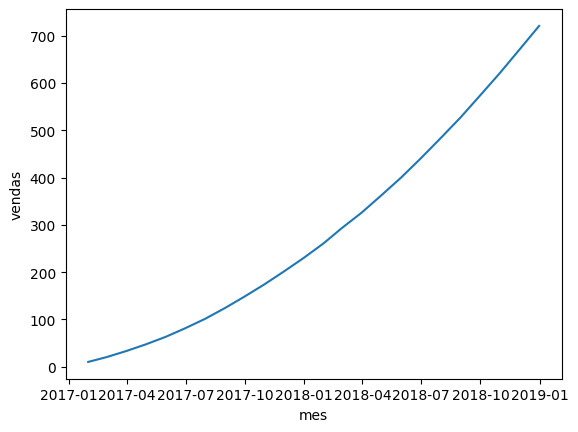

In [10]:
sns.lineplot(alucar, x='mes', y='vendas')

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

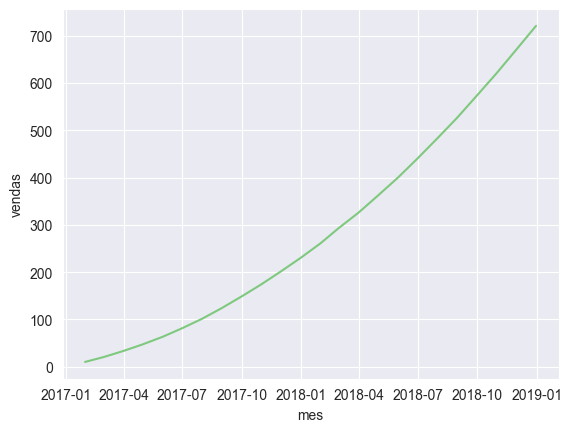

In [12]:
alucar_aumento = sns.lineplot(alucar, x='mes', y='vendas')

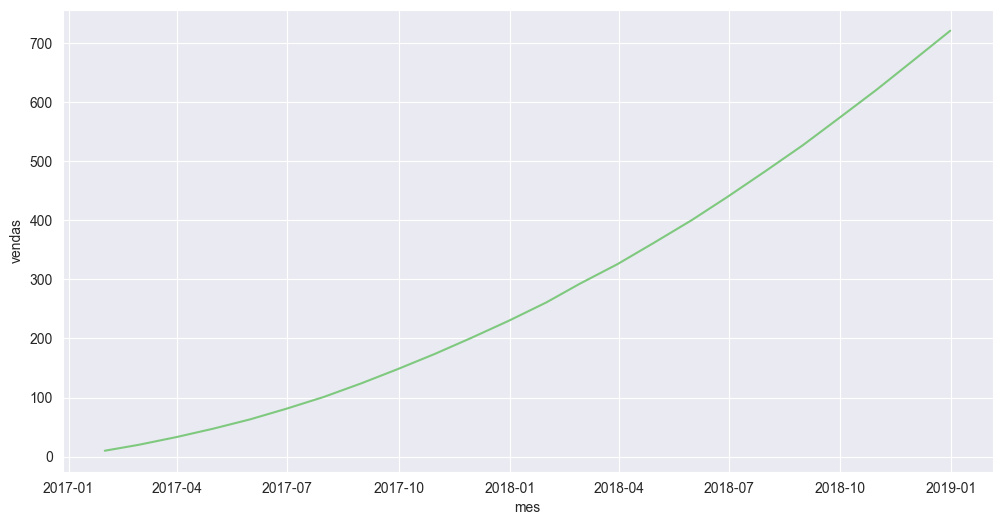

In [13]:
alucar_aumento.figure.set_size_inches(12,6)
alucar_aumento.figure

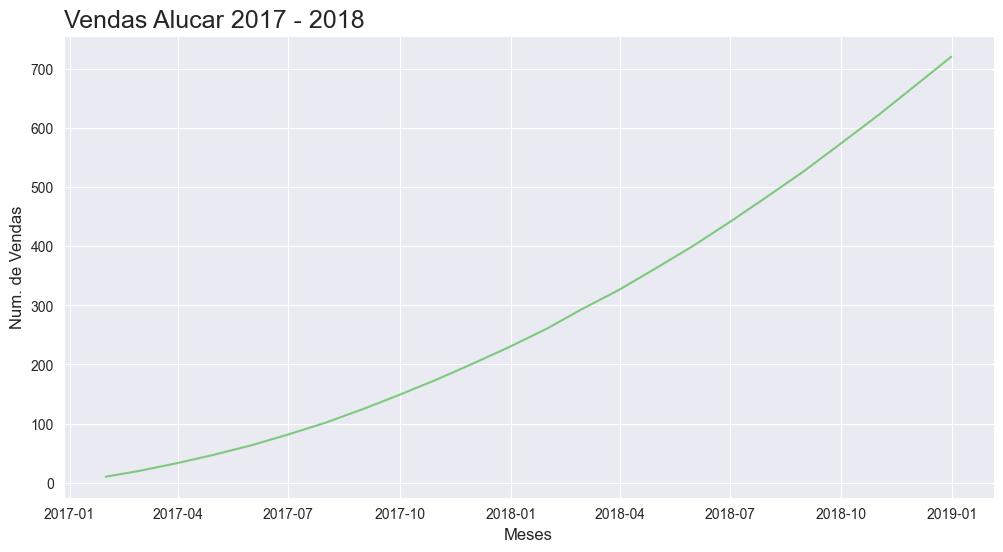

In [14]:
alucar_aumento.set_title('Vendas Alucar 2017 - 2018', loc='left', fontsize=18)
alucar_aumento.set_xlabel('Meses', fontsize = 12)
alucar_aumento.set_ylabel('Num. de Vendas', fontsize = 12)
alucar_aumento.figure

In [15]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [16]:
alucar['aumento'] = alucar['vendas'].diff()

In [17]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


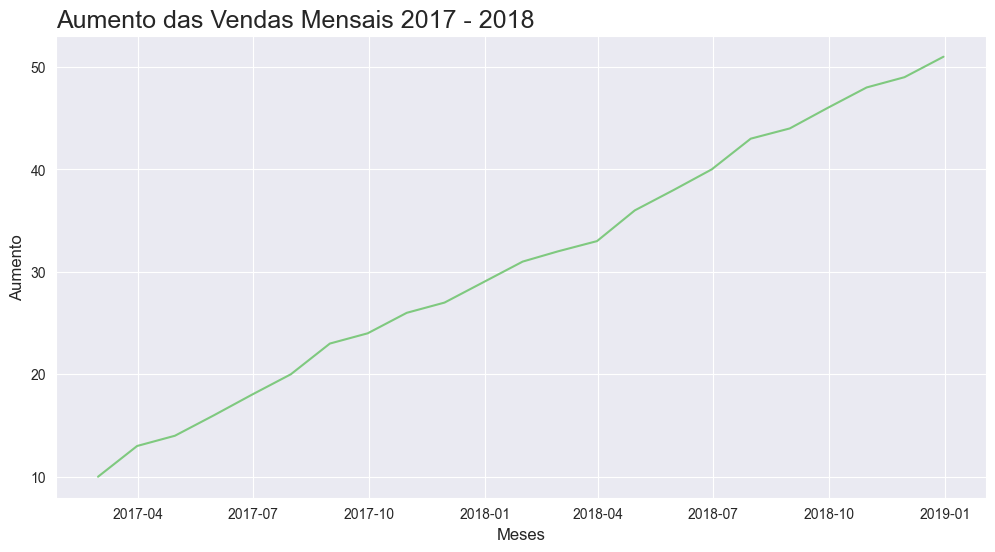

In [18]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
alucar_aumento = sns.lineplot(alucar, x='mes', y='aumento')
alucar_aumento.figure.set_size_inches(12,6)
alucar_aumento.set_title('Aumento das Vendas Mensais 2017 - 2018', loc='left', fontsize=18)
alucar_aumento.set_xlabel('Meses', fontsize = 12)
alucar_aumento.set_ylabel('Aumento', fontsize = 12)
alucar_aumento = alucar_aumento

In [19]:
def plotar(dataset, x, y, titulo, labelx, labely):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    graph = sns.lineplot(dataset, x=x, y=y)
    graph.figure.set_size_inches(12,6)
    graph.set_title(titulo, loc='left', fontsize=18)
    graph.set_xlabel(labelx, fontsize = 12)
    graph.set_ylabel(labely, fontsize = 12)

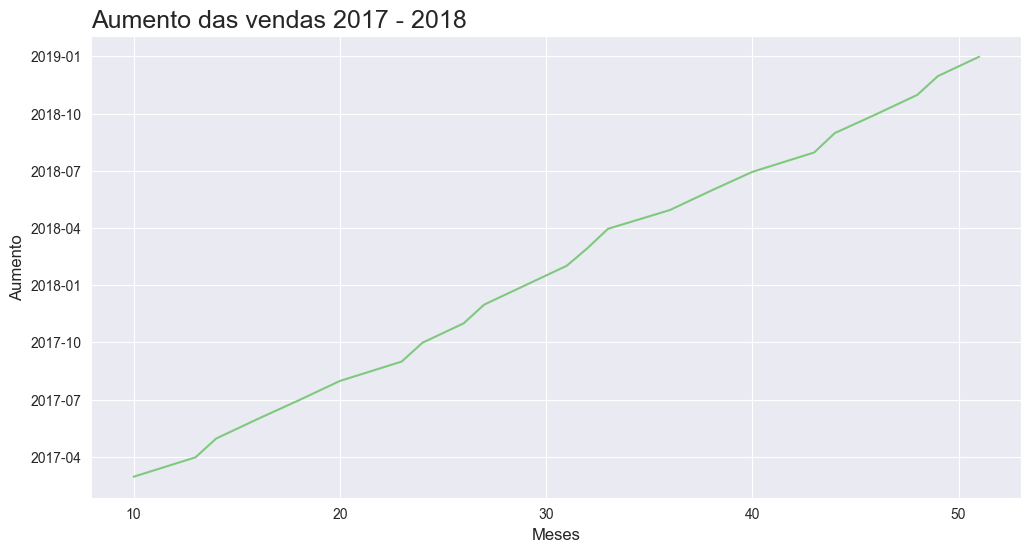

In [20]:
plotar(alucar,'aumento','mes','Aumento das vendas 2017 - 2018', 'Meses', 'Aumento')

In [21]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


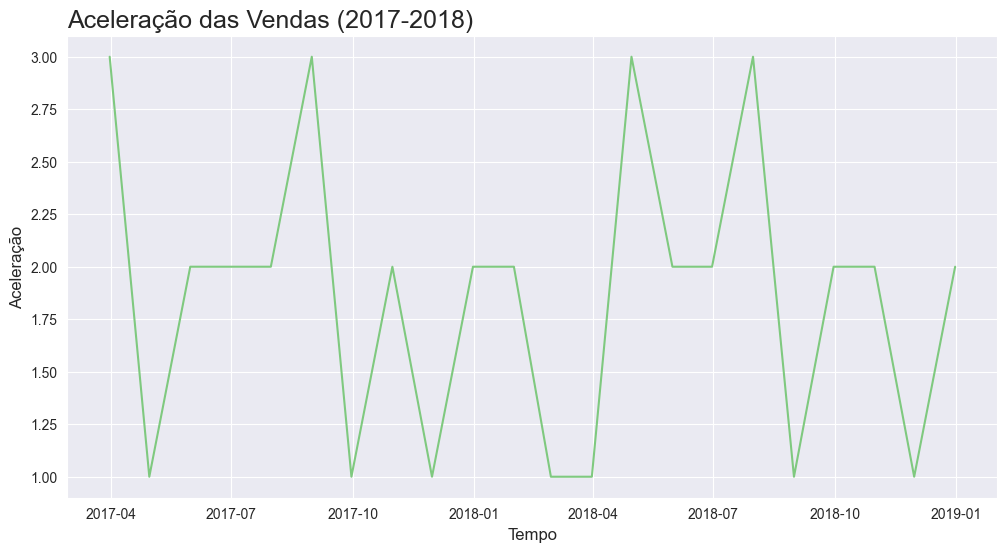

In [22]:
alucar_acel = plotar(alucar, 'mes', 'aceleracao', 'Aceleração das Vendas (2017-2018)', 'Tempo', 'Aceleração')

<AxesSubplot:title={'left':'Aceleração do Aumento de Vendas'}, xlabel='mes', ylabel='aceleracao'>

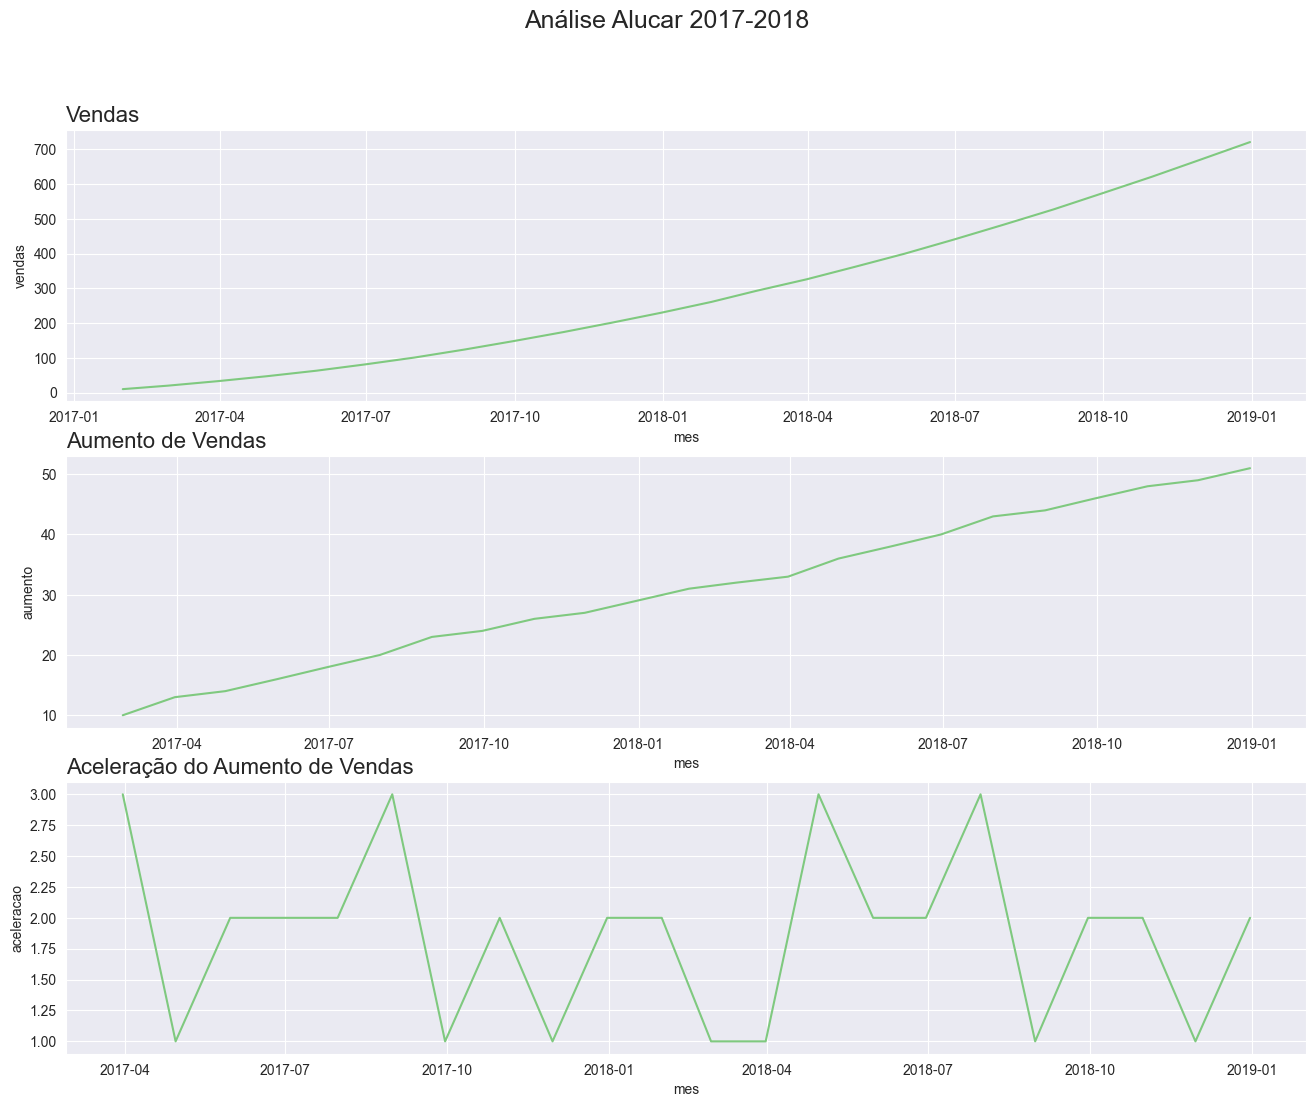

In [23]:
graficos = plt.figure(figsize=(16,12))
graficos.suptitle('Análise Alucar 2017-2018', fontsize = 18)
alucar_venda= plt.subplot(3,1,1)
alucar_venda.set_title('Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='vendas')
alucar_aumento = plt.subplot(3,1,2)
alucar_aumento.set_title('Aumento de Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='aumento')
alucar_aceleracao = plt.subplot(3,1,3)
alucar_aceleracao.set_title('Aceleração do Aumento de Vendas', fontsize = 16, loc='left')
sns.lineplot(alucar, x='mes', y='aceleracao')

In [24]:
def plot_comparacao(dataset, x, y1, y2, y3, titulo, subt1, subt2, subt3):
    graficos = plt.figure(figsize=(16,12))
    graficos.suptitle(titulo, fontsize = 18)
    alucar_venda= plt.subplot(3,1,1)
    alucar_venda.set_title(subt1, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y1)
    alucar_aumento = plt.subplot(3,1,2)
    alucar_aumento.set_title(subt2, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y2)
    alucar_aceleracao = plt.subplot(3,1,3)
    alucar_aceleracao.set_title(subt3, fontsize = 16, loc='left')
    sns.lineplot(data = dataset, x=x, y=y3)

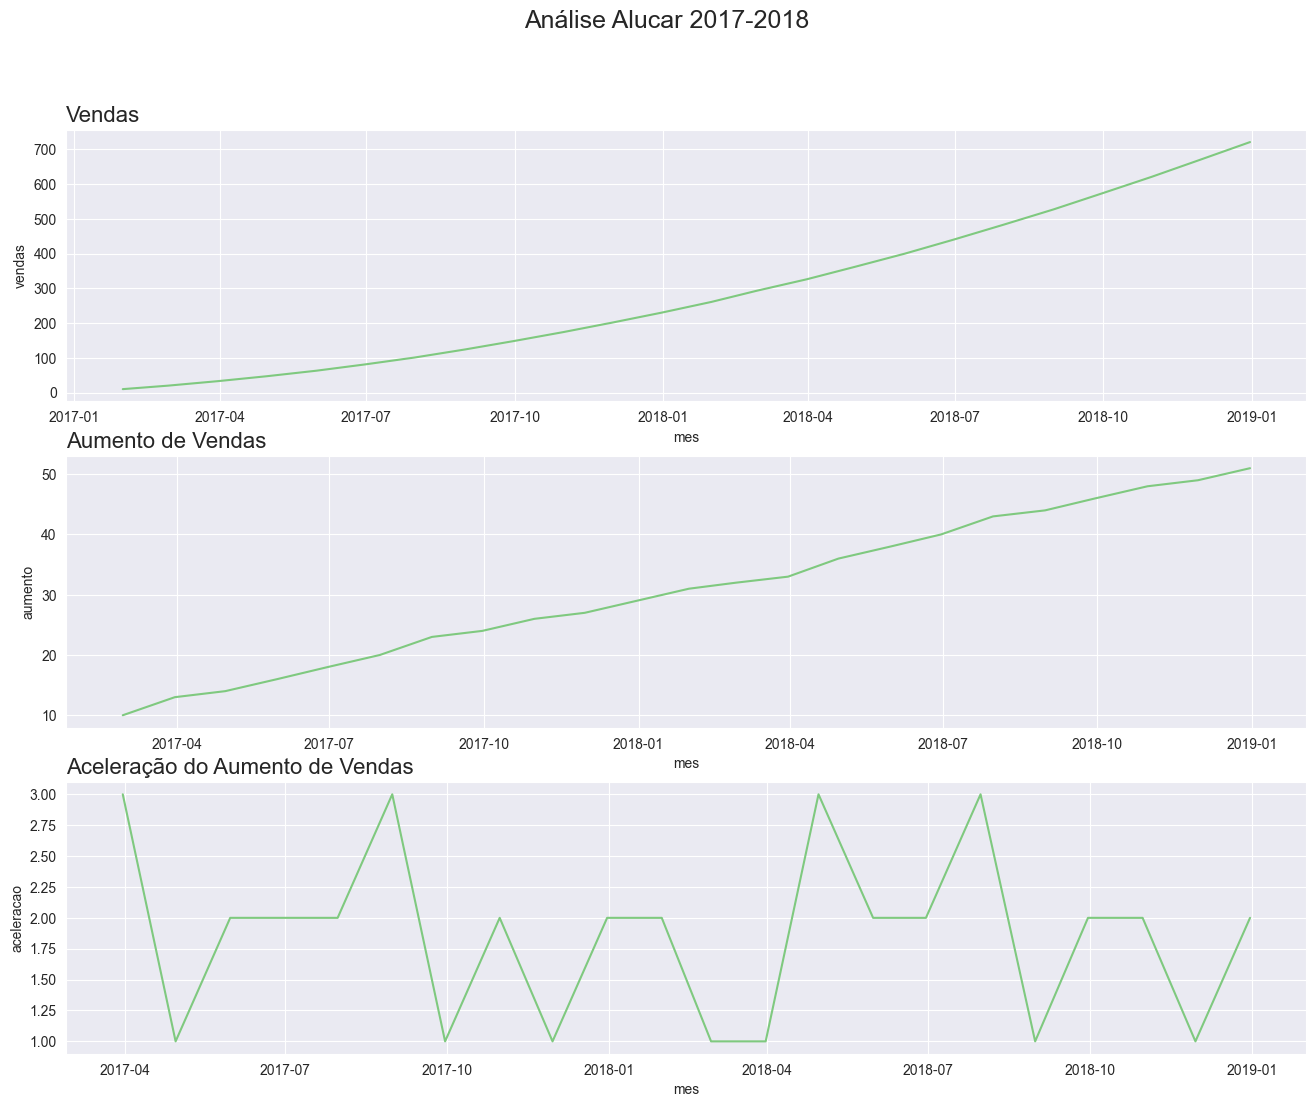

In [25]:
plot_comparacao(alucar, 'mes', 'vendas', 'aumento', 'aceleracao', 'Análise Alucar 2017-2018', 'Vendas', 'Aumento de Vendas', 'Aceleração do Aumento de Vendas')

In [26]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

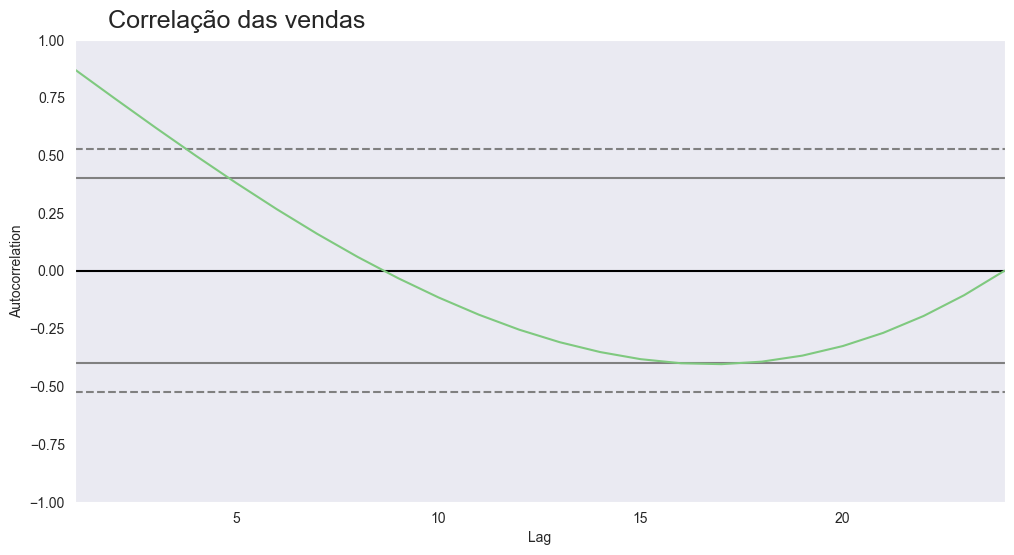

In [27]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação das vendas', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['vendas'])


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

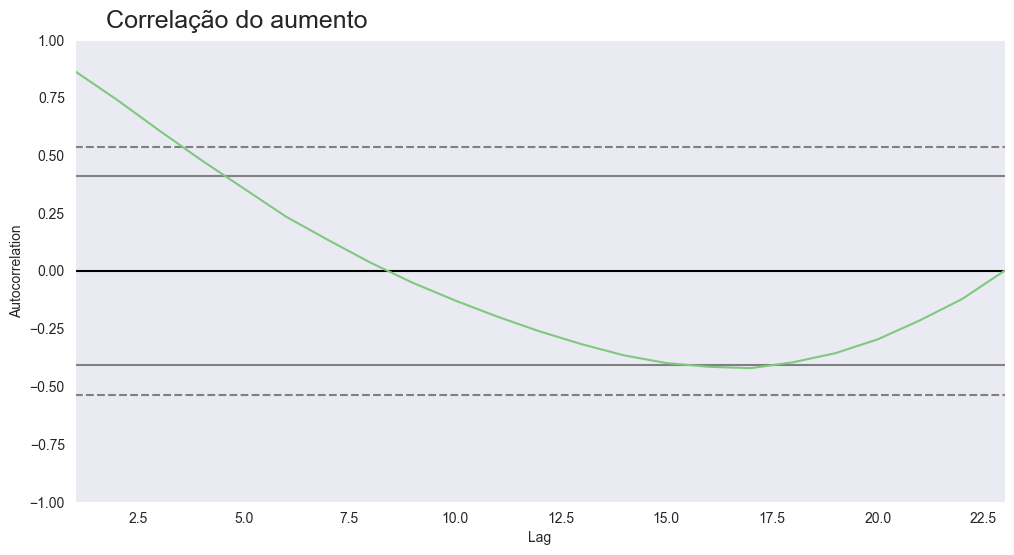

In [28]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação do aumento', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['aumento'][1:])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

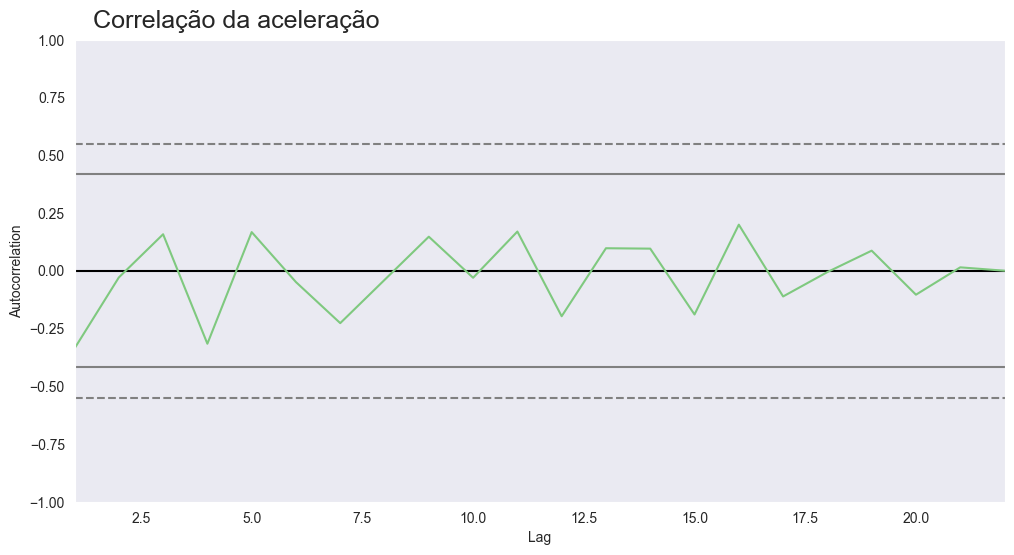

In [29]:
autocorrel = plt.figure(figsize=(12,6))
autocorrel.suptitle('Correlação da aceleração', fontsize = 18, x=0.26, y=0.93)
autocorrelation_plot(alucar['aceleracao'][2:])

# Aluca - Assinantes da Newsletter

In [30]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [31]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [32]:
print('Quantidade de linhas e colunas:', assinantes.shape)
print('Quantidade de dados nulos:', assinantes.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [33]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [34]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [35]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


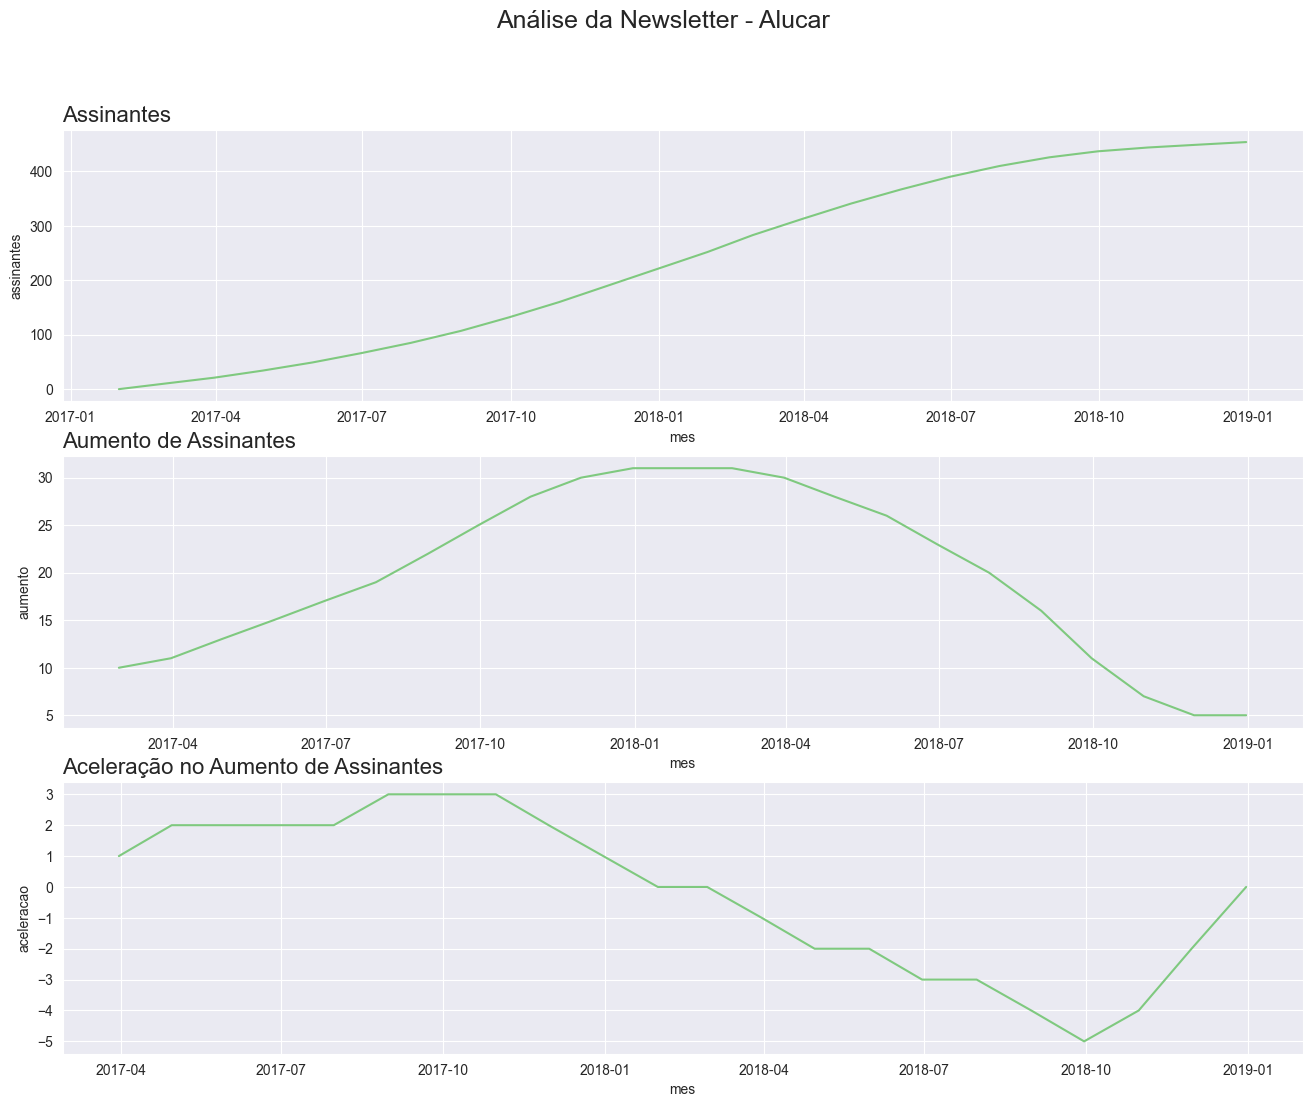

In [36]:
plot_comparacao(assinantes,'mes','assinantes', 'aumento', 'aceleracao', 'Análise da Newsletter - Alucar', 'Assinantes', 'Aumento de Assinantes', 'Aceleração no Aumento de Assinantes')

# Chocolura - Análise de Vendas 

In [37]:
chocolura = pd.read_csv('data/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [38]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [39]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)

In [40]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [41]:
print('Quantidade de linhas e colunas:', chocolura.shape)
print('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [44]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


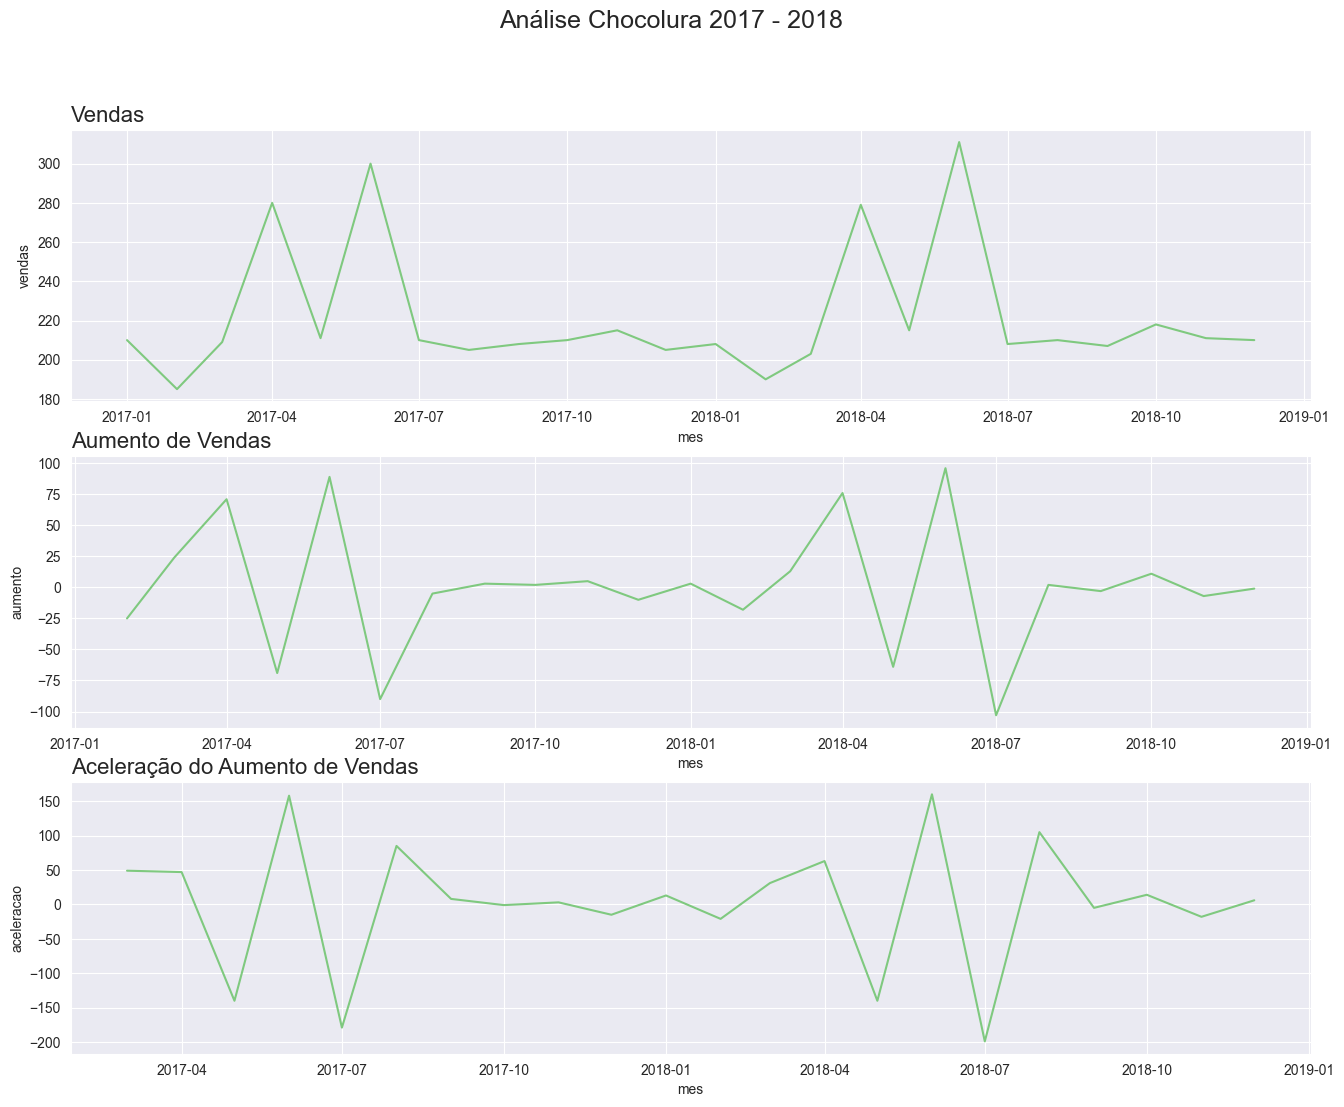

In [45]:
plot_comparacao(chocolura, 'mes', 'vendas', 'aumento', 'aceleracao', 'Análise Chocolura 2017 - 2018', 'Vendas', 'Aumento de Vendas', 'Aceleração do Aumento de Vendas')

# Chocolura - Vendas Diárias (Outubro e Novembro)

In [46]:
vendas_por_dia_chocolura = pd.read_csv('data/vendas_por_dia.csv')
vendas_por_dia_chocolura.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [48]:
print('Quantidade de linhas e colunas:', vendas_por_dia_chocolura.shape)
print('Quantidade de dados nulos:', vendas_por_dia_chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [50]:
vendas_por_dia_chocolura.dtypes

dia       object
vendas     int64
dtype: object

In [52]:
vendas_por_dia_chocolura['dia'] = pd.to_datetime(vendas_por_dia_chocolura.dia)
vendas_por_dia_chocolura.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [53]:
vendas_por_dia_chocolura['aumento'] = vendas_por_dia_chocolura['vendas'].diff()
vendas_por_dia_chocolura['aceleracao'] = vendas_por_dia_chocolura.aumento.diff()
vendas_por_dia_chocolura.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


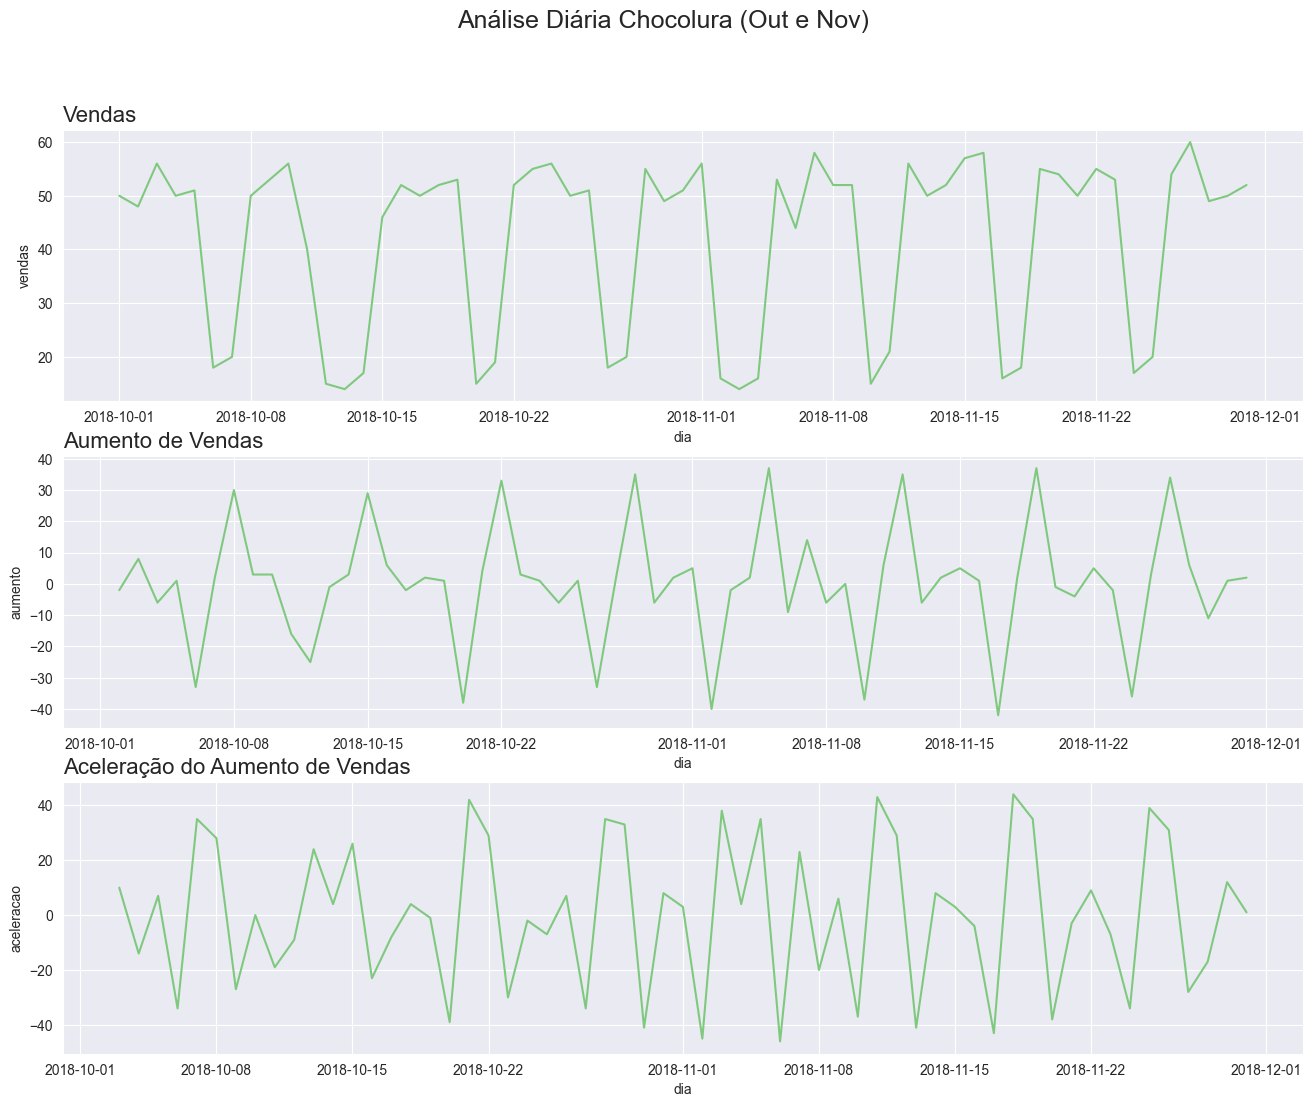

In [55]:
plot_comparacao(vendas_por_dia_chocolura, 'dia', 'vendas', 'aumento', 'aceleracao', 'Análise Diária Chocolura (Out e Nov)', 'Vendas', 'Aumento de Vendas', 'Aceleração do Aumento de Vendas')

**Analisando a sazonalidade**

In [60]:
vendas_por_dia_chocolura['dia_da_semana'] = vendas_por_dia_chocolura['dia'].dt.day_name()
vendas_por_dia_chocolura.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [61]:
vendas_por_dia_chocolura['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [62]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado', 'Sunday': 'Domingo'}

In [64]:
vendas_por_dia_chocolura['dia_da_semana'].replace(dias_traduzidos, inplace=True)

In [66]:
vendas_por_dia_chocolura.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os Dias**

In [67]:
vendas_agrupadas = vendas_por_dia_chocolura.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_19600\2632057022.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia_chocolura.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()


In [68]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárias**

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

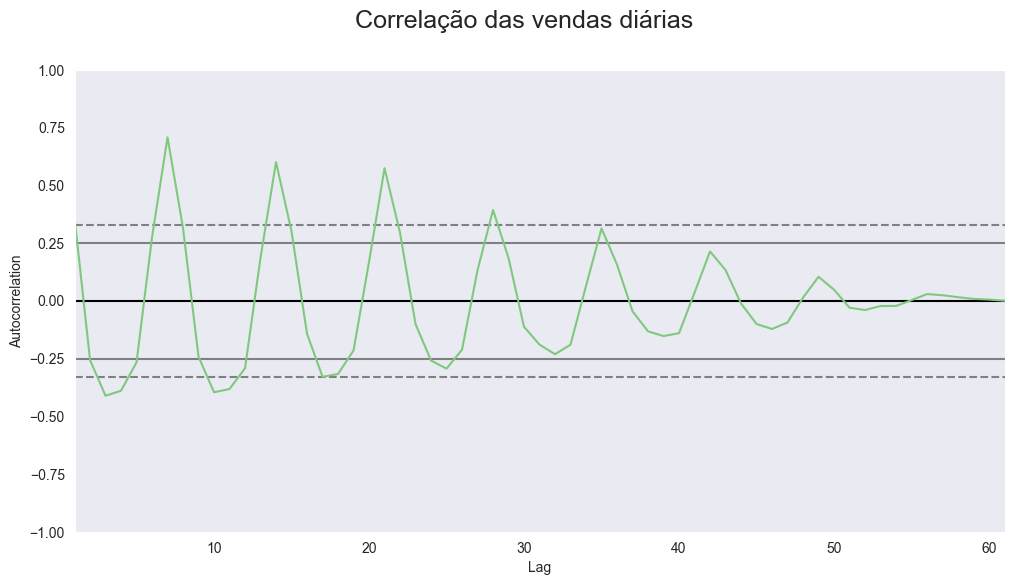

In [69]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18)
autocorrelation_plot(vendas_por_dia_chocolura['vendas'])